# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
df = pd.read_csv('../data/combined_cleaned_data.csv')

## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    315 non-null    object 
 1   close   315 non-null    float64
 2   ticker  315 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.5+ KB


(None,
 date      0
 close     0
 ticker    0
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['date','close','ticker']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
close,315.0,0.482352,0.281524,0.0,0.239788,0.467236,0.70062,1.0,0.123135,-1.084424


## 3) Distributions (TODO: add at least 3)

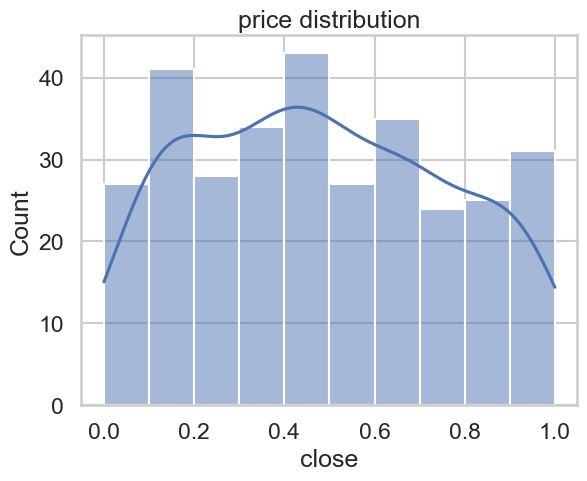

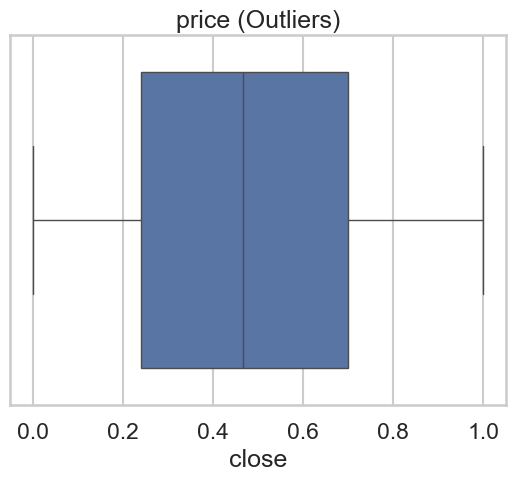

In [4]:
sns.histplot(df['close'], kde=True)
plt.title('price distribution')
plt.show()

sns.boxplot(x=df['close'])
plt.title('price (Outliers)')
plt.show()

## 4) Relationships (TODO: add at least 2)

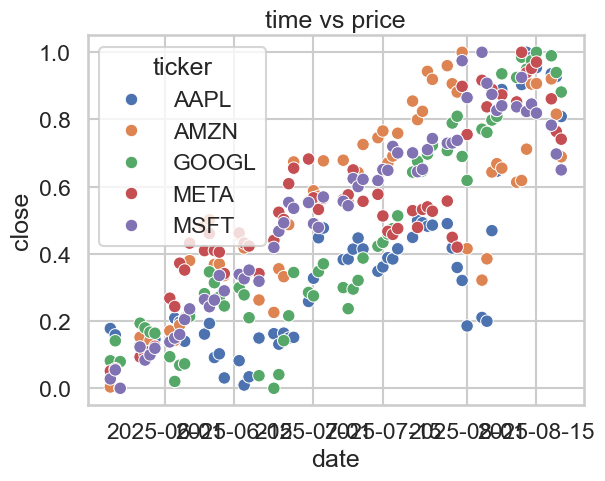

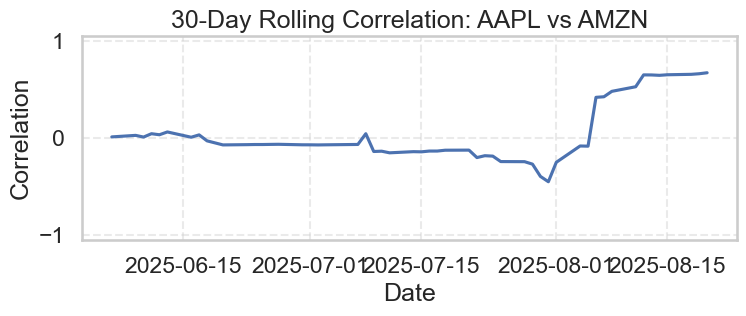

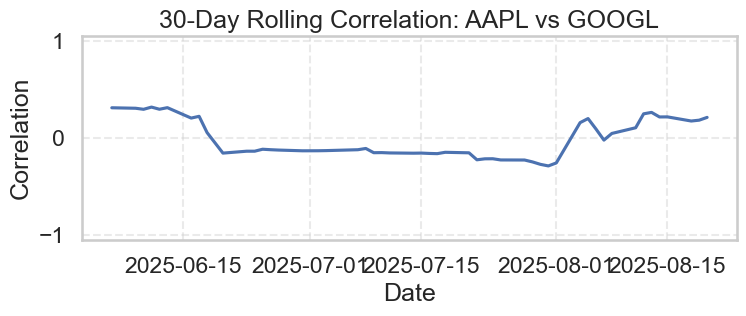

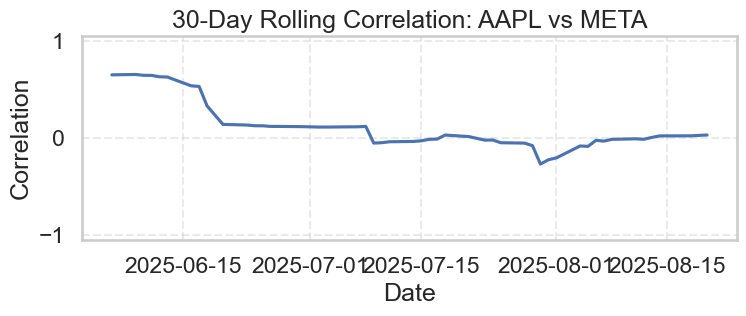

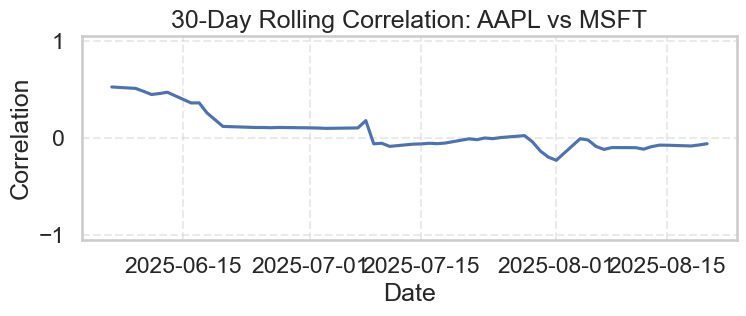

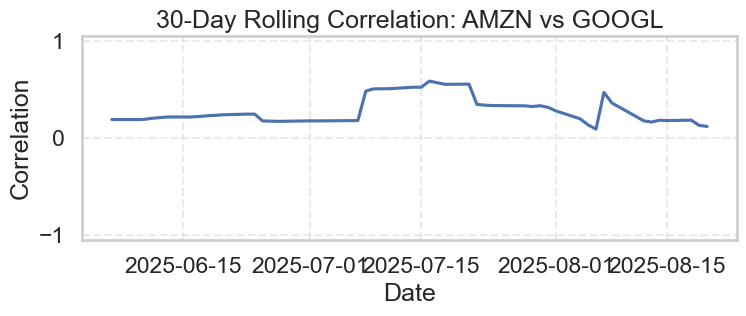

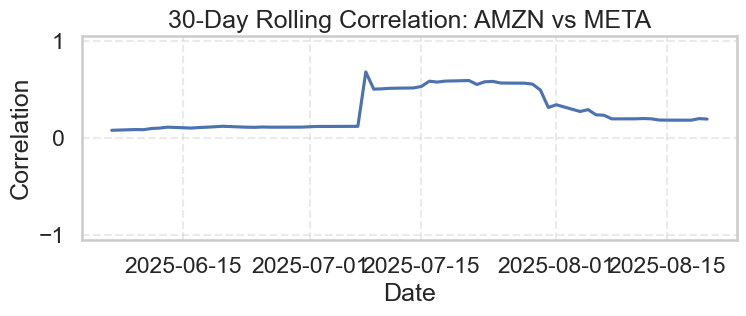

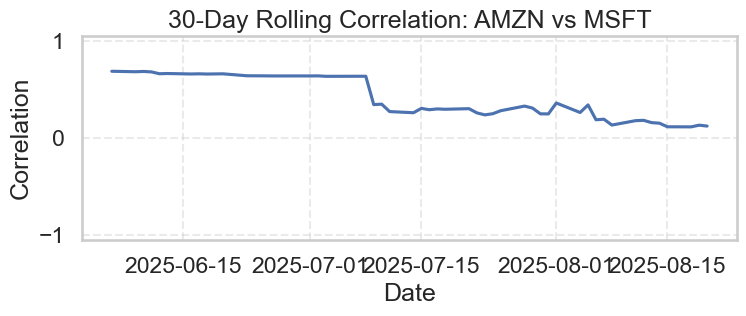

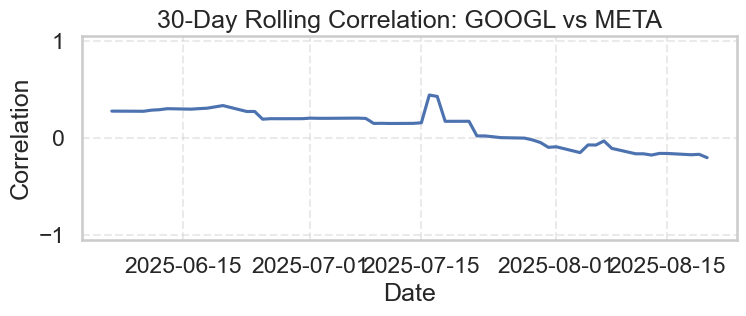

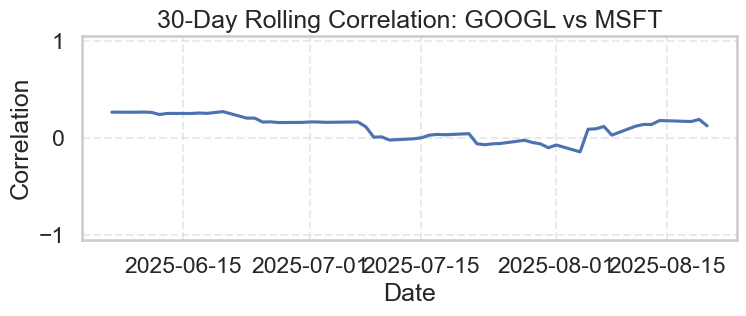

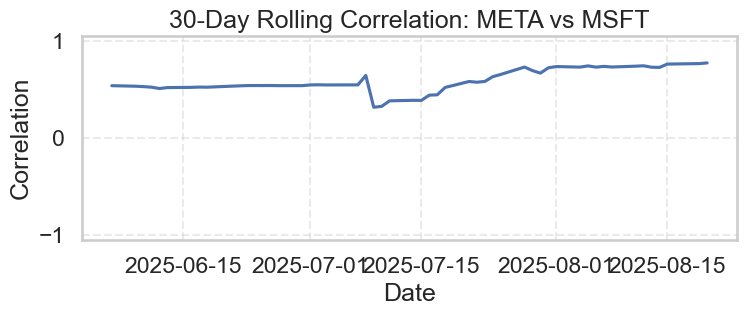

In [8]:
import itertools
sns.scatterplot(data=df, x='date', y='close', hue='ticker')
plt.title('time vs price')
plt.show()

df.columns = [c.strip().lower() for c in df.columns]

req = {"date", "close", "ticker"}
missing = req - set(df.columns)
if missing:
    raise ValueError(f"Missing columns: {missing}")

df["date"] = pd.to_datetime(df["date"])
df["close"] = pd.to_numeric(df["close"], errors="coerce")
df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

prices = df.pivot(index="date", columns="ticker", values="close").sort_index()
returns = prices.pct_change()

window = 30       
min_periods = 10    

tickers = list(returns.columns.dropna())
pairs = list(itertools.combinations(tickers, 2))

for a, b in pairs:
    rc = returns[a].rolling(window=window, min_periods=min_periods).corr(returns[b])

    fig, ax = plt.subplots(figsize=(8, 3.5))
    ax.plot(rc.index, rc.values)
    ax.set_title(f"{window}-Day Rolling Correlation: {a} vs {b}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Correlation")
    ax.set_ylim(-1.05, 1.05)
    ax.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()

## 5) (Optional) Correlation matrix

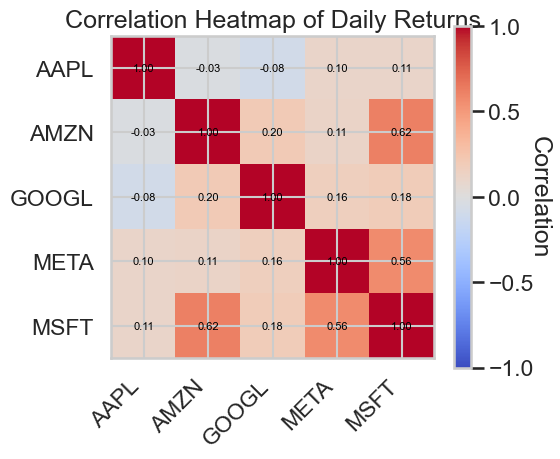

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df = df.sort_values(['ticker', 'date']).reset_index(drop=True)

prices_wide = df.pivot(index='date', columns='ticker', values='close').sort_index()
returns = prices_wide.pct_change()

corr_matrix = returns.corr()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr_matrix.values, cmap="coolwarm", vmin=-1, vmax=1)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation', rotation=270, labelpad=12)

tick_labels = corr_matrix.columns.tolist()
ax.set_xticks(np.arange(len(tick_labels)))
ax.set_yticks(np.arange(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45, ha='right')
ax.set_yticklabels(tick_labels)
ax.set_title('Correlation Heatmap of Daily Returns')

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        ax.text(j, i, f"{corr_matrix.values[i, j]:.2f}",
                ha="center", va="center", fontsize=8, color="black")

plt.tight_layout()
plt.show()

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)